In [1]:
from src.IO import load_NIST_data, load_transition_data
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from src import *
import src.lineshapes as lineshapes
from src.atom import Atom
import src.graphers as graphers
from pprint import pprint
import numpy as np

In [2]:
def draw_levels(atom, plot_type='norm', **kwargs):
    posdict = {l.name: (l.term.J, l.level_Hz) for l in atom.levels.values()}
    if plot_type == 'norm':
        model = atom.levelsModel.copy()
    elif plot_type == 'hf':
        model = atom.hfModel.copy()
    elif plot_type == 'z':
        model = atom.zModel.copy()
    for node in model.nodes():
        try:
            model.remove_edge(node, node)
        except:
            pass
    nx.draw(model, pos=posdict, node_shape="_", with_labels=True, font_size=8, **kwargs)

    plt.show()


def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load_from_pickle=False):
    if load_from_pickle:
        a = Atom.from_pickle(f'atoms/{species}.atom')
    else:
        df = load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = Atom.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                              num_levels=num_levels,
                                              B=B,
                                              hf_csv=f'resources/{species}_Hyperfine.csv',
                                              transitions_df=trans_df,
                                              allowed=0b101)
        if save:
            a.to_pickle(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'resources/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [3]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': "./resources/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [4]:
# whether to load from pickle
load_from_pickle = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 20
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load_from_pickle=load_from_pickle, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.82it/s]
adding level 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                                     
adding transition 4f14.5d 2D3/2 → 4f14.6p 2P*1/2                                                                       
adding internal transitions to 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                   

Generation complete


In [5]:
pprint(a.levels.list_names())

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2']


In [6]:
# pprint(a.transitions.list_names())

In [7]:
for l in a.levels.values():
    print(l, l.compute_gJ(), l.lande, l.compute_gJ()-l.lande)

4f14.6s 2S1/2 2.0023 1.998 0.0042999999999999705
4f13.(2F*).6s2 2F*7/2 1.1431857142857142 1.145 -0.0018142857142857682
4f13.(2F*).6s2 2F*5/2 0.8568142857142858 0.862 -0.005185714285714238
4f14.5d 2D3/2 0.79954 1.802 -1.0024600000000001
4f14.5d 2D5/2 1.20046 1.202 -0.0015399999999998748
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2 1.505553260959867 1.57 -0.0644467390401331
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2 2.26217667981098 1.44 0.8221766798109802
4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 1.4045100462922009 1.32 0.08451004629220082
4f14.6p 2P*1/2 0.6658999999999999 0.667 -0.001100000000000101
4f14.6p 2P*3/2 1.3341 1.333 0.001100000000000101
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2 1.2814683472370527 0.935 0.34646834723705267
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2 1.567009640746582 1.112 0.455009640746582
4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2 1.2313 1.23 0.0013000000000000789
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2 1.3033728698351752 1.331 -0.027627130164824765
4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5

In [8]:
a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

In [9]:
a.to_pickle(f'atoms/173Yb_full.atom')

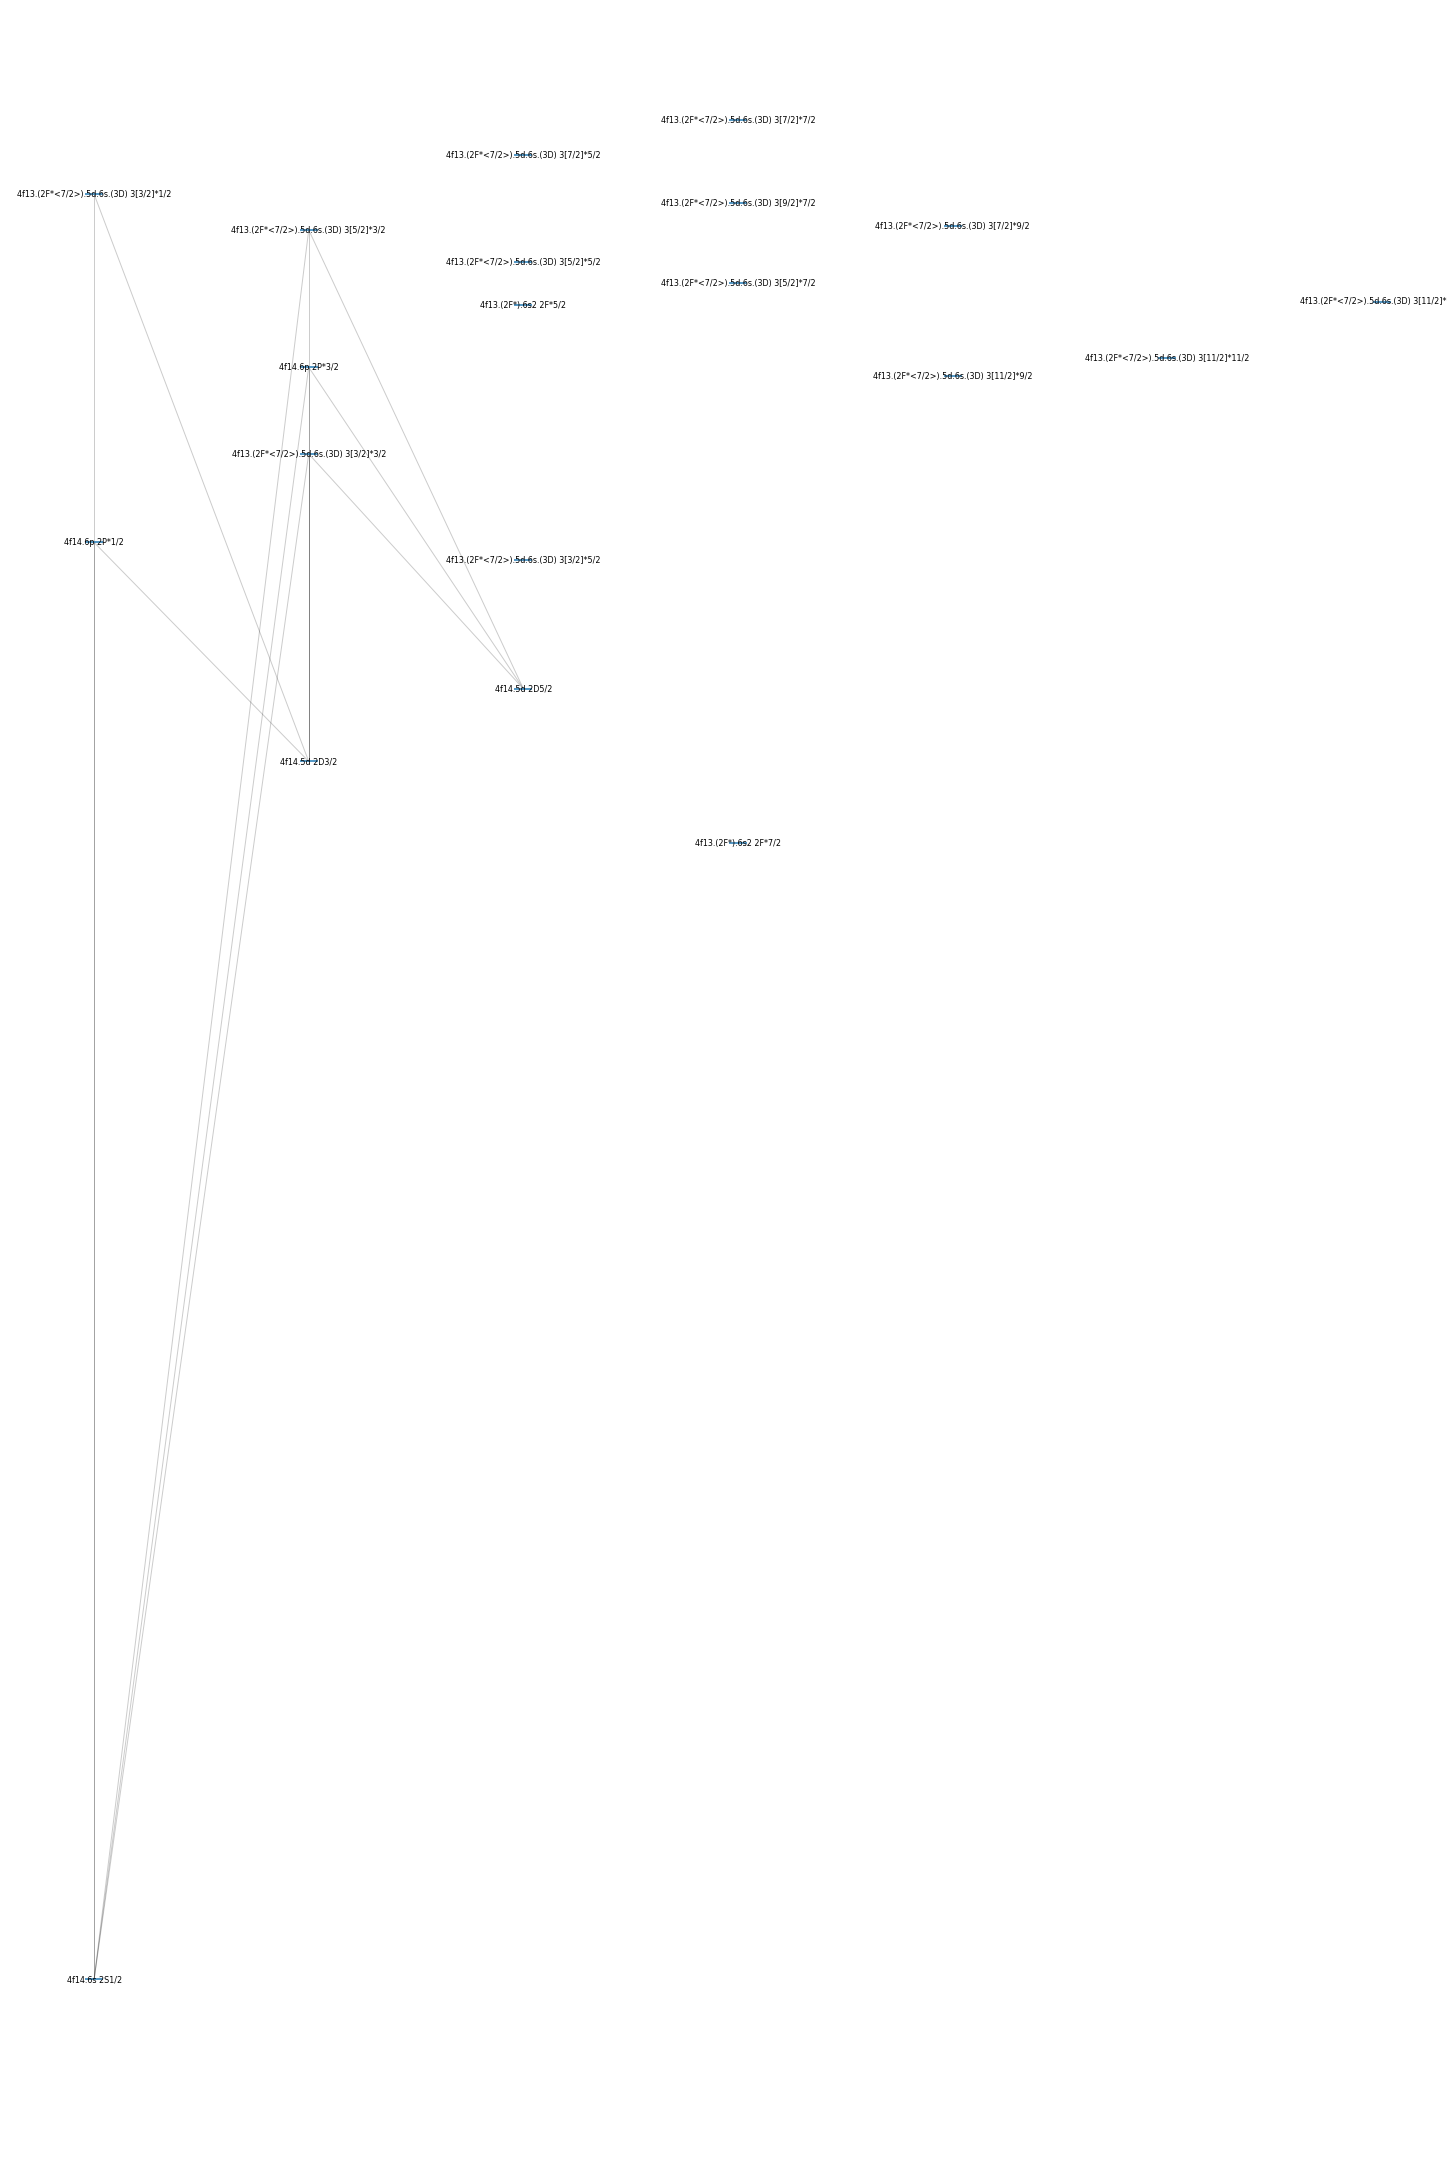

In [10]:
plt.figure(figsize=(20, 30))
draw_levels(a, edge_color=(0., 0., 0., 0.2))

In [11]:
g = nx.Graph()
g.add_nodes_from(zip(range(1, 10), [{'level':i} for i in np.arange(0, 1000, 31)]))
g.nodes()
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (3, 6), (4, 6),(7, 8)])

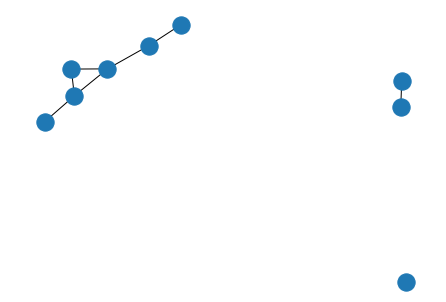

In [12]:
nx.draw(g)

In [13]:
def enforce(g):
    # make a subgraph of the full model containing only the fixed edges
    set_graph = g
    subgraphs = (set_graph.subgraph(c) for c in nx.connected_components(set_graph))
    for sg in subgraphs:
        # find the lowest lying level in the subgraph
        nodes = sg.nodes(data='level')
        l = None
        for k, n in nodes:
            if l is None:
                l, kl = n, k
            elif n < l:
                l, kl = n, k
        # perform a depth first search starting from the lowest energy node in the subgraph,
        # setting subsequent levels one at a time
        search = nx.bfs_edges(sg, source=kl)
        print(list(search))
#         for edge in search:
#             t = sg.edges()[edge]['transition']
#             if t.E_lower.fixed and t.E_upper.fixed and t.set_freq.to(Hz).magnitude != abs(t.E_lower.level_Hz - t.E_upper.level_Hz):
#                 raise ValueError('Constraint problem') # TODO: make this a custom error?
#             elif t.E_upper.fixed:
#                 t.E_lower.level_Hz = t.E_upper.level_Hz - t.set_freq.to(Hz).magnitude
#             else:
#                 t.E_upper.level_Hz = t.E_lower.level_Hz + t.set_freq.to(Hz).magnitude
#             t.E_upper.fixed = t.E_lower.fixed = True


In [14]:
enforce(g)

[(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]
[(7, 8)]
[]


In [15]:
ss='fff'

if ss:
    print(True)
else:
    print(False)

True
